In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal


In [19]:
mae_data = np.array([1.41, 1.33, 1.30])
ll_data = np.array([-176.93, -156.23,-157.25])
corr_data = np.array([0.98, 0.98, 0.98])

y_data = np.array(range(3))
markers = ["s", "^", "^"]
marker_sizes = [60., 60., 60.]
colours = ['tab:red', 'tab:green', 'tab:blue']



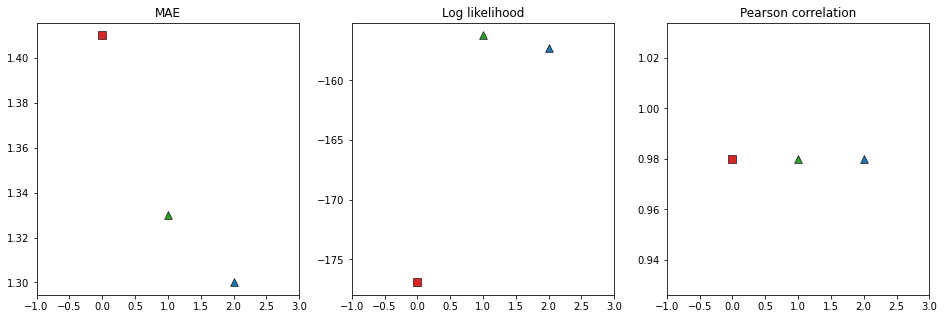

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))

ax1.set_xlim([-1, 3])
ax1.title.set_text("MAE")
ax1.set_xticks([], minor=True)
for i in range(3):
    ax1.scatter(y_data[i], mae_data[i], marker=markers[i], s=marker_sizes[i], color=colours[i], linewidth=0.6, edgecolor='k')
    
ax2.set_xlim([-1, 3])
ax2.title.set_text("Log likelihood")
ax2.set_xticks([], minor=True)
for i in range(3):
    ax2.scatter(y_data[i], ll_data[i], marker=markers[i], s=marker_sizes[i], color=colours[i], linewidth=0.6, edgecolor='k')
    
ax3.set_xlim([-1, 3])
ax3.title.set_text("Pearson correlation")
ax3.set_xticks([], minor=True)
for i in range(3):
    ax3.scatter(y_data[i], corr_data[i], marker=markers[i], s=marker_sizes[i], color=colours[i], linewidth=0.6, edgecolor='k')

In [ ]:
def plot_all_toy_results(df):
    
    data_names = ["MAE",
                  "Pearson correlation",
                  "Log likelihood"]
    
    titles = ["MAE",
              "Pearson correlation",
              "Log likelihood"]
    
    labels = ["convCNP",
              "convGNP (linear)",
              "convGNP (kvv)"]
    
   # yticks = [np.linspace(-1.0, 1.5, 6),
   #           np.linspace(-1.0, 1.5, 6),
   #           np.linspace(-1.5, 1.0, 6),
   #           np.linspace(-1.5, 0.5, 5),
   #           np.linspace(-0.5, 2.5, 4)]
    
    markers = ["^", "s", "s"]
    marker_sizes = [60., 60., 50.]
    
    colors = ['tab:red', 'tab:green', 'tab:blue']
    
    fig = plt.figure(figsize=(14, 5))
    
    for i, d in enumerate(data_names):
        
        plt.subplot(1, len(data_names), i+1)
        
        x = np.arange(len(df[d]) + 2)
#         x = [x_ for i, x_ in enumerate(x)]
        ones = np.ones_like(x)
        y = df[d]
        e = df[d + '-error']
        oracle_result = df[d]["Oracle-GP"]
        oracle_error = df[d + "-error"]["Oracle-GP"]
        oracle_diag_result = df[d]["Oracle-GP-diag"]
        oracle_diag_error = df[d + "-error"]["Oracle-GP-diag"]

        for j in range(2, len(labels)+2):
            
            if i == len(data_names) - 1:
                plt.scatter(x[j], y[j], marker=markers[j-2], s=marker_sizes[j-2], color=colors[j-2], linewidth=0.6, edgecolor='k', zorder=2, label=labels[j-2])
            
            else:
                plt.scatter(x[j], y[j], marker=markers[j-2], s=marker_sizes[j-2], color=colors[j-2], linewidth=0.6, edgecolor='k', zorder=2)

        plt.xticks([])
        plt.title(titles[i], fontsize=18)
        plt.xlim([0., 14])
        
        if i == 0:
            plt.ylabel('Log. likelihood', fontsize=24)
    
        ylims = [(-1.10, 1.65),
                 (-1.10, 1.53),
                 (-1.75, 1.35),
                 (-1.75, 0.90),
                 (-0.60, 2.6)]
            
        plt.yticks(yticks[i], fontsize=14)
        plt.ylim(ylims[i])
        
        
    handles, labels = plt.gca().get_legend_handles_labels()
#     fig.legend(handles[:2], labels[:2], loc='right', ncol=2, fontsize=13)

    fig.legend(handles[:2], labels[:2], loc='lower left', ncol=1, fontsize=14, bbox_to_anchor=(0.02, 0.015, 0.10, 0.10))
    fig.legend(handles[2:], labels[2:], loc='center', ncol=4, fontsize=14, bbox_to_anchor=(0.4, 0.0, 0.4, 0.2))

    plt.tight_layout()
    fig.subplots_adjust(bottom=0.22)
    plt.savefig("./plots/toy-results.pdf")
    plt.show()